#CS 4263 Final Project - Colorizing the Past
Fabian Aguilar Gomez<br>
Noor Alaskari<br>
Ivan Rivera<br>
The purpose of this project is to gain an understanding on the concepts that were taught in the course. More specifically Convolutional Neural Networks and their applications. The problem that we are attempting to solve is image colorization and attempting to colorize black and whtie images using CNNs. We referenced material such as the papers that we presented in our research paper as well as other tutorials and blog posts in TensorFlow, Towards Data Science, and The Medium. We were able to produce some color in the images rendering this project as a success.

## Imports
Import the necessary libraries needed./

Pip installing python-resize-image to be able to clean and resize Images to one size 256 to make it easier for the model to train

In [ ]:
!pip install python-resize-image

In [ ]:
#imports 
from keras.layers import Conv2D, Conv2DTranspose, UpSampling2D
from keras.layers import Activation, Dense, Dropout, Flatten, InputLayer
from keras.layers.normalization import BatchNormalization
from keras.callbacks import TensorBoard
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from skimage.color import rgb2lab, lab2rgb, rgb2gray
from skimage.io import imsave
import numpy as np
import cv2
import os
import random
import tensorflow as tf
import  sys
from PIL import Image
from resizeimage import resizeimage
import matplotlib.pyplot as plt

Conntecting Google drive to Collab in order to use our images Data Set, since the dataset was uploaded in the Google Drive.

In [ ]:
#images to folder in google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True )

Mounted at /content/drive


Change the working directory in our google drive to the location of the dataset.

In [ ]:
cwd = os.getcwd()  # Get the current working directory (cwd)
print("Files in %r" % (cwd))
%cd drive/MyDrive/
!ls

Files in '/content'
/content/drive/MyDrive
 Dataset			       output
'Getting started.pdf'		       result
 group3.mp4			       Test
 Internship_Form_20150602_7833_.gdoc   Train
 Internship_Form_20150602_7833_.pdf   'Untitled Folder'
'N Midtearm .gdoc'


cd to here to save new resized image this folder is should be empty prior to resizing the imges becuses this folder will contain the final reszied images. 

In [ ]:
%cd Train/

[Errno 2] No such file or directory: 'Train/'
/content/drive/MyDrive/Train


In [ ]:
#here where you have your dataset location with diffrent sizes
data_paths2 = [os.path.join(pth, f) 
    for pth, dirs, files in os.walk("/content/drive/MyDrive/Train/") for f in files]


# only run this once and make sure you are in an empty folder to save the new images
# base = '/content/drive/MyDrive/Dataset/'
# for path in os.listdir(base):
#     with Image.open(os.path.join(base, path)) as image:
#         cover = resizeimage.resize_cover(image, [256, 256])
#         cover.save(path, image.format)

# to check if resize worked
for filename in data_paths2:
    image = Image.open(filename)
    width , height = image.size
    print(width, height)


## Read the data
Read the data from the dataset and split it into a training and a testing data in order to be able to test our data and then test it. Additionally, the images will be resized 256x256 since the proposed CNN model will take images of these dimensions and attempt to colorize the image. The images will be stored as NumPy arrays which can be modified. In each value in the array represents a pixel value that is in the image.

After checking that all images have been successfully resized go back to the root level of our dataset

In [ ]:
%cd ..

/content/drive/MyDrive


### Resize images
Resize the images to be 256x256 RGB images. Addtionally, split our dataset into a Training portion which will be used to train the model and Testing portion which will be used to test our model. Since we don't want to colorize images that the model was trained on.

In [ ]:
#Resize the images to dimensions of 256x256
X = []
for filename in os.listdir('./Train/'):
    X.append(img_to_array(load_img('./Train/'+filename, target_size=(256,256))))
X = np.array(X, dtype=float)

# Set up train and test data
split = int(0.95*len(X))
Xtrain = X[:split]
Xtrain = 1.0/255*Xtrain

print(X)

[[[[145. 112.  93.]
   [145. 112.  95.]
   [147. 114.  99.]
   ...
   [ 10.  12.   1.]
   [ 10.  12.   1.]
   [ 10.  12.   1.]]

  [[147. 114.  97.]
   [149. 116.  99.]
   [150. 117. 102.]
   ...
   [ 10.  12.   1.]
   [  8.  10.   0.]
   [  8.  10.   0.]]

  [[149. 116.  99.]
   [151. 118. 103.]
   [152. 118. 106.]
   ...
   [ 10.  12.   1.]
   [ 10.  12.   1.]
   [ 10.  12.   1.]]

  ...

  [[  3.   4.   0.]
   [  4.   5.   0.]
   [  5.   6.   0.]
   ...
   [ 32.  26.   4.]
   [ 31.  22.   5.]
   [ 31.  22.   5.]]

  [[  4.   5.   0.]
   [  5.   6.   0.]
   [  5.   6.   0.]
   ...
   [ 39.  32.  14.]
   [ 34.  25.   8.]
   [ 37.  28.  11.]]

  [[  3.   4.   0.]
   [  4.   5.   0.]
   [  5.   6.   0.]
   ...
   [ 58.  46.  30.]
   [ 61.  45.  30.]
   [ 61.  45.  30.]]]]


## Model
Create the CNN model in order to colorize the images. The model will take in an input image of 256x256 black and white image. The model will have ReLu activation function with same padding and will use a rmsprop optimizer with a loss of mse and using the accuracy for the metrics.

In [ ]:
model = Sequential()
model.add(InputLayer(input_shape=(256, 256, 1)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same', strides=2))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(UpSampling2D((2, 2)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(2, (3, 3), activation='tanh', padding='same'))
model.add(UpSampling2D((2, 2)))
model.compile(optimizer='rmsprop', loss='mse',metrics=['accuracy'])

### Print the model and it's summary
Print the model to visually represent how it looks like and the flow of the model.

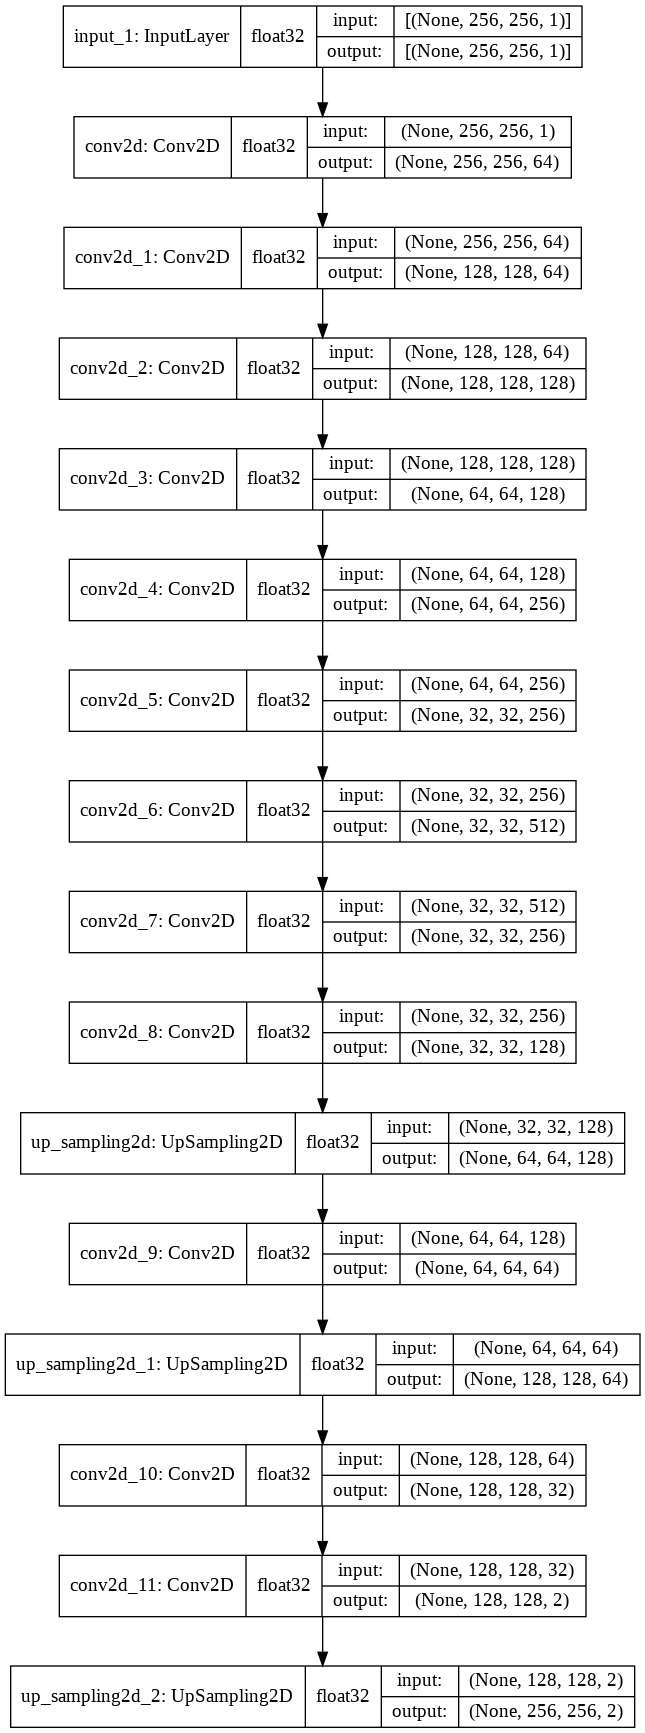

In [ ]:
#print the model
tf.keras.utils.plot_model(model, show_shapes=True, show_dtype=True,expand_nested=True)

In [ ]:
#Model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 64)      640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      36928     
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 128, 128, 128)     73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 64, 64, 128)       147584    
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 64, 64, 256)       295168    
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 32, 32, 256)       590080    
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 512)       1

##Train
Create a training lopp in to start training our model. A batch size of 50 was chosen since anything higher propogated an out of memory error in Google Colab and the number of epochs to 1000 for similar reasons. If running the code in a better rig then take into consideration in increasing these to a big enough value in order to get more accurate results and test the hypothesis that this model we created is being held back by hardware restrictions.

In [ ]:
# Image transformer
datagen = ImageDataGenerator(
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=20,
        horizontal_flip=True,
        validation_split=0.2)

# Generate training data
batch_size = 50
def image_a_b_gen(batch_size):
    for batch in datagen.flow(Xtrain, batch_size=batch_size,subset='training'):
        lab_batch = rgb2lab(batch)
        X_batch = lab_batch[:,:,:,0]
        Y_batch = lab_batch[:,:,:,1:] / 128
        yield (X_batch.reshape(X_batch.shape+(1,)), Y_batch)

# Train model      
tensorboard = TensorBoard(log_dir="output/first_run")
history = model.fit(image_a_b_gen(batch_size),verbose=2 ,callbacks=[tensorboard],epochs=1000, steps_per_epoch=10,
                    validation_data=image_a_b_gen(batch_size),validation_steps=2)

Epoch 1/1000
10/10 - 71s - loss: 0.4746 - accuracy: 0.4998 - val_loss: 0.0143 - val_accuracy: 0.5453
Epoch 2/1000
10/10 - 25s - loss: 0.0148 - accuracy: 0.4991 - val_loss: 0.0114 - val_accuracy: 0.4632
Epoch 3/1000
10/10 - 23s - loss: 0.0134 - accuracy: 0.4979 - val_loss: 0.0137 - val_accuracy: 0.4780
Epoch 4/1000
10/10 - 23s - loss: 0.0132 - accuracy: 0.5457 - val_loss: 0.0136 - val_accuracy: 0.5701
Epoch 5/1000
10/10 - 23s - loss: 0.0138 - accuracy: 0.5627 - val_loss: 0.0128 - val_accuracy: 0.6476
Epoch 6/1000
10/10 - 23s - loss: 0.0132 - accuracy: 0.5624 - val_loss: 0.0121 - val_accuracy: 0.5466
Epoch 7/1000
10/10 - 23s - loss: 0.0137 - accuracy: 0.5387 - val_loss: 0.0139 - val_accuracy: 0.5057
Epoch 8/1000
10/10 - 23s - loss: 0.0226 - accuracy: 0.5174 - val_loss: 0.0120 - val_accuracy: 0.5699
Epoch 9/1000
10/10 - 22s - loss: 0.0135 - accuracy: 0.5570 - val_loss: 0.0144 - val_accuracy: 0.5515
Epoch 10/1000
10/10 - 24s - loss: 0.0133 - accuracy: 0.5657 - val_loss: 0.0154 - val_accura

##Results
Compare the results to the *Colorful* model and addtionally also plot the information that was gained in the training loop. This will help visualize what exactly we need to work on in the future when seeking to improve our model.

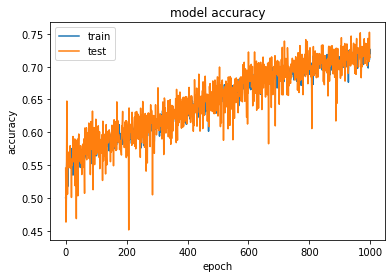

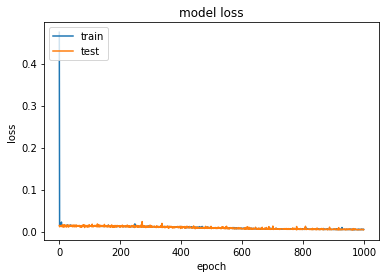

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### Save the model
Save the model and it's weights to be used for later testing in images.

In [ ]:
# Save model
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("model.h5")

##Test the model
Get the testing subdataset from the dataset that was used to trail the model and attempt to colorize the images.

In [ ]:
# Test images
Xtest = rgb2lab(1.0/255*X[split:])[:,:,:,0]
Xtest = Xtest.reshape(Xtest.shape+(1,))
Ytest = rgb2lab(1.0/255*X[split:])[:,:,:,1:]
Ytest = Ytest / 128
print(model.evaluate(Xtest, Ytest, batch_size=batch_size))

1/1 [==============================] - 6s 6s/step - loss: 0.0102 - accuracy: 0.5627
[0.010204186663031578, 0.5626686215400696]


###Create a directory for the results
Save the output images in a directory since there will be many images.

In [ ]:
!mkdir result

###Testing loop
Load the weights and test the model on the testing data to get the output images with color. The images as mentioned will be stored in a seperate folder which will contain the colorized images. The testing images are are random images that we pulled off the internet and placed in a small dataset since we kept running into out of memory issues with google colab.

In [ ]:
#Load the weights
model.load_weights("model.h5")

In [ ]:
color_me = []
for filename in os.listdir('./Test/'):
    color_me.append(img_to_array(load_img('./Test/'+filename, target_size=(256,256))))
color_me = np.array(color_me, dtype=float)
color_me = rgb2lab(1.0/255*color_me)[:,:,:,0]
color_me = color_me.reshape(color_me.shape+(1,))

# Test model
output = model.predict(color_me)
output = output * 128

# Output colorizations
for i in range(len(output)):
    cur = np.zeros((256, 256, 3))
    cur[:,:,0] = color_me[i][:,:,0]
    cur[:,:,1:] = output[i]
    imsave("result/img_"+str(i)+".png", lab2rgb(cur))

##Compare results
Compare the results of our model with random images that have been pulled from the web. In order to change the image to be compared to just change the value in the cv2.imread() with the desired image. The images for the colorful model have been generated in our own personal machines with the model provided in the following link: <br>
https://github.com/richzhang/colorization <br>
This was to make it more readable and also we did not want to have some issues with Google Colab and downloading the model here. So we downloaded the model to our machine generated the image and just read it here with the function stated. <br>
For all of these example the example to be tested on can be changed by simply chaning the parameters and the names if so wished to in order to read the images that we want to test the model on.

###Compare legacy black and white image
Compare a legacy black and white image, meaning it's original value is grayscale and colorize both.

In [ ]:
#Compare images
colorful = cv2.imread("saved_eccv16.png")
ours = cv2.imread("/content/result/img_1.png")
#Resize the original image
ours = cv2.resize(ours, (1200,673))

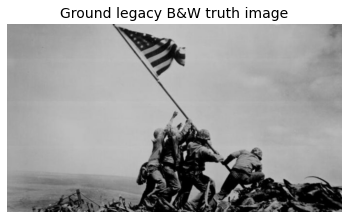

In [ ]:
#Load ground truth B&W image
flag = cv2.imread("test.jpg")
pug =cv2.cvtColor(flag, cv2.COLOR_BGR2GRAY)
plt.axis("off")
plt.title("Ground legacy B&W truth image", fontsize=14)
plt.imshow(flag);

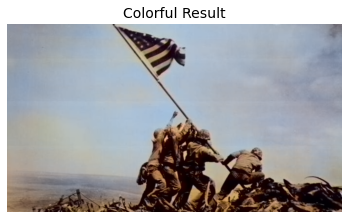

In [ ]:
#Plot the images
colorful = cv2.cvtColor(colorful, cv2.COLOR_RGB2BGR)
plt.imshow(colorful)
plt.axis("off")
plt.title("Colorful Result",fontsize=14);

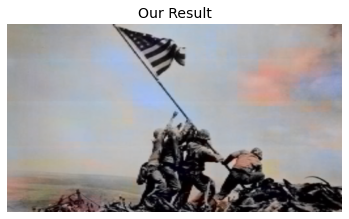

In [ ]:
#Plot our result
ours = cv2.cvtColor(ours, cv2.COLOR_RGB2BGR)
plt.imshow(ours)
plt.axis("off")
plt.title("Our Result",fontsize=14);

% of the difference in per pixel value between the colorized image from both the colorful model and our proposed model.

In [ ]:
#Compare the first images
result = cv2.absdiff(colorful,ours)
result = result.astype(np.uint8)
percentage = (np.count_nonzero(result)*100) / result.size
print(percentage)

90.51081393429091


###RGB image attempt
We attempt to colorize an RGB image that was pulled from the internet and as mentioned in order to change the image that is wished to be tested change the image parameter in the cv.imread() function. For this we ran a single image multiple times with different values each time aswell as other images, the most recent image appears in the cells below.

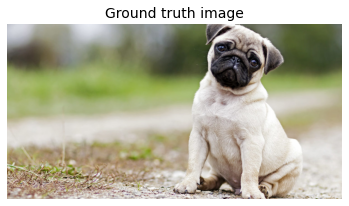

In [ ]:
#Load ground truth comparison image
pug = cv2.imread("pug.jpg")
pug =cv2.cvtColor(pug, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.title("Ground truth image", fontsize=14)
plt.imshow(pug);

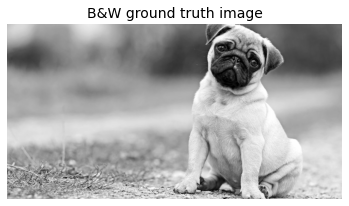

In [ ]:
#Load BW truth comparison image
pugBW = cv2.imread("pugBW.jpg")
pugBW =cv2.cvtColor(pugBW, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.title("B&W ground truth image", fontsize=14)
plt.imshow(pugBW);

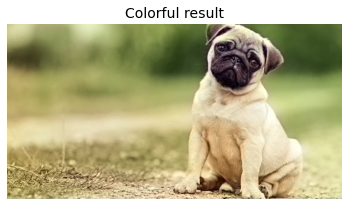

In [ ]:
#Load colorized image by the first model
pugColor = cv2.imread("pugColor.png")
pugColor =cv2.cvtColor(pugColor, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.title("Colorful result", fontsize=14)
plt.imshow(pugColor);

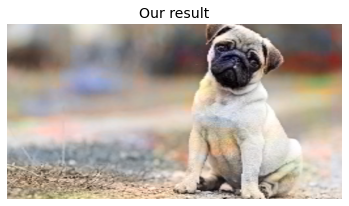

In [ ]:
#Plot our result
ourPug = cv2.imread("/content/result/img_1.png")
ourPug = cv2.resize(ourPug, (1200,628))
ourPug =cv2.cvtColor(ourPug, cv2.COLOR_BGR2RGB)
plt.axis("off")
plt.title("Our result", fontsize=14)
plt.imshow(ourPug);

###Calcutate difference
Get the difference in per pixel value of the images when compared to each other. The higher the % the more difference there is in per pixel value between the images.

In [ ]:
#Compare the Pug ground truth to the colorful
result = cv2.absdiff(pug,pugColor)
result = result.astype(np.uint8)
percentage = (np.count_nonzero(result)*100) / result.size
print("Pug ground truth to colorful: " + str(percentage))
#Compare the pug ground truth to ours
result = cv2.absdiff(pug,ourPug)
result = result.astype(np.uint8)
percentage = (np.count_nonzero(result)*100) / result.size
print("Pug ground truth to ours: " + str(percentage))
#Compare pug colorful to ours
result = cv2.absdiff(pugColor,ourPug)
result = result.astype(np.uint8)
percentage = (np.count_nonzero(result)*100) / result.size
print("Pug colorful to ours: " + str(percentage))

Pug ground truth to colorful: 94.27587579617834
Pug ground truth to ours: 96.16295116772824
Pug colorful to ours: 96.9101203113942


In [ ]:
!rm -rf Test output
!ls

drive  model.h5  model.json  sample_data  Train
